<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 1: Familiarize with the dataset

In [6]:
# Basic info
boston_df.info()

# First few rows
boston_df.head()

# Descriptive stats
boston_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [7]:
# 🔹 Task 2: Generate Descriptive Statistics & Visualizations

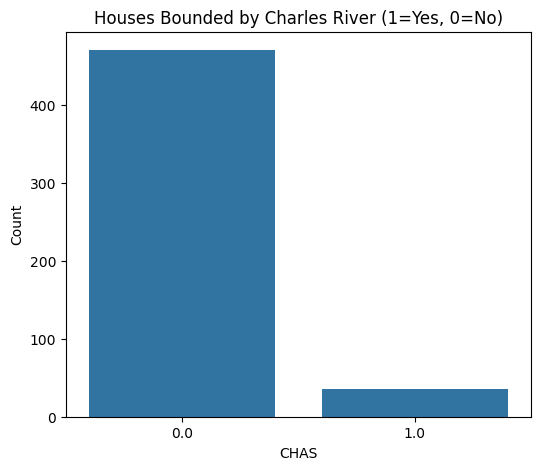

In [9]:
pyplot.figure(figsize=(6,5))
sns.countplot(x=boston_df['CHAS'])
pyplot.title("Houses Bounded by Charles River (1=Yes, 0=No)")
pyplot.xlabel("CHAS")
pyplot.ylabel("Count")
pyplot.show()


<ipython-input-11-83b56d092285>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="CHAS", data=boston_df, palette="Set2")


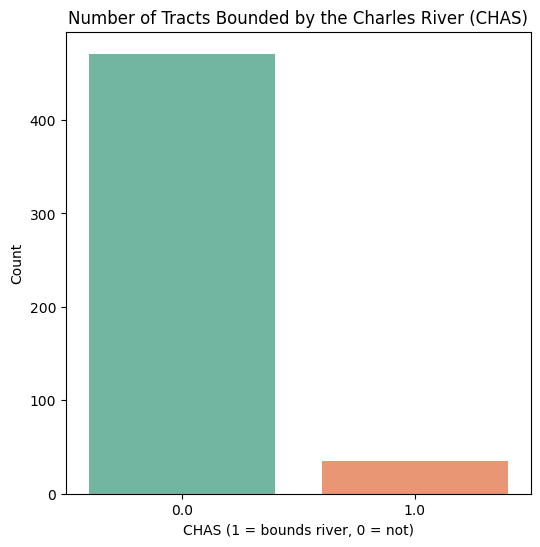

In [11]:
pyplot.figure(figsize=(6,6))
sns.countplot(x="CHAS", data=boston_df, palette="Set2")
pyplot.title("Number of Tracts Bounded by the Charles River (CHAS)")
pyplot.xlabel("CHAS (1 = bounds river, 0 = not)")
pyplot.ylabel("Count")
pyplot.show()


In [13]:
# Split data into groups
river_yes = boston_df[boston_df["CHAS"] == 1]["MEDV"]
river_no = boston_df[boston_df["CHAS"] == 0]["MEDV"]

# Independent samples t-test
t_stat, p_val = scipy.stats.ttest_ind(river_yes, river_no, equal_var=False)  # Welch’s t-test
print("T-Statistic:", t_stat, "P-Value:", p_val)


T-Statistic: 3.113291312794837 P-Value: 0.003567170098137517


In [14]:
# Group AGE
boston_df["AGE_group"] = pd.cut(boston_df["AGE"], bins=[0,35,70,100],
                         labels=["≤35 years","36–70 years",">70 years"])

# Extract groups
g1 = boston_df[boston_df["AGE_group"] == "≤35 years"]["MEDV"]
g2 = boston_df[boston_df["AGE_group"] == "36–70 years"]["MEDV"]
g3 = boston_df[boston_df["AGE_group"] == ">70 years"]["MEDV"]

# ANOVA test
f_stat, p_val = scipy.stats.f_oneway(g1, g2, g3)
print("F-Statistic:", f_stat, "P-Value:", p_val)


F-Statistic: 36.40764999196599 P-Value: 1.7105011022702984e-15


In [16]:
corr, p_val = scipy.stats.pearsonr(boston_df["NOX"], boston_df["INDUS"])
print("Correlation Coefficient:", corr, "P-Value:", p_val)


Correlation Coefficient: 0.7636514469209192 P-Value: 7.913361061210442e-98
